Reference:  
[1] “Pygad.torchga Module¶.” Pygad.torchga Module - PyGAD 2.14.2 Documentation, pygad.readthedocs.io/en/latest/README_pygad_torchga_ReadTheDocs.html. 

In [549]:
# import libraries
import pandas as pd
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13}) 
from mpl_toolkits.axes_grid1 import host_subplot
import numpy as np
import math
import pygad
# import pygad.torchga
from pygad import torchga
np.random.seed(0)

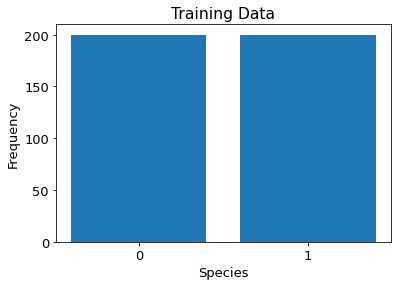

       Mean       Std     Diff1     Diff2     PCAd1     PCAd2  Label  \
0  0.843184  0.185235  0.012203  0.114446  0.017396  0.102197      0   
1  0.859247  0.106347  0.003125  0.213642  0.017052  0.107497      0   
2  0.848619  0.129744  0.006687  0.059411  0.017846  0.108474      0   
3  0.867164  0.097041  0.002018  0.262512  0.017393  0.107333      0   
4  0.942067  0.033819  0.001625  0.297624  0.019180  0.107844      0   

   extraNode  
0   0.000000  
1   0.005025  
2   0.010050  
3   0.015075  
4   0.020101  


In [550]:
# load training data
data= pd.read_excel('Anger.xlsx')

# drop first column as it is identifier and the second column as 
data.drop(data.columns[:2], axis=1, inplace=True)
data.at[data['Label'] == 'Genuine', ['Label']] = 0
data.at[data['Label'] == 'Posed', ['Label']] = 1

# Also convert all string numeric values to int
data.iloc[:,2:8]=data.iloc[:, 2:8].apply(pd.to_numeric)

# extract frequency of each class
class_freq = data['Label'].value_counts()
class_freq = list(class_freq.sort_index())

# visualize distribution of data
# x-axis labels and length
x_axis = list(range(0,2))

graph = plt.bar(x_axis, class_freq)
plt.xticks(x_axis)
plt.ylabel('Frequency')
plt.xlabel('Species')
plt.title('Training Data')
plt.show()

# invertible output
one_to_one=np.linspace(0,1,class_freq[1])
one_to_one_code=np.concatenate((one_to_one,one_to_one))
data['extraNode']=one_to_one_code

print(data.head())

Looking at the distribution above, which shows that the classes are faily well-balanced. 

## Data-preprocessing

In [551]:
# From lab3
# normalise input data by columns
n_features=data.shape[1] - 2
input_pattern = data.iloc[:, :n_features]
# normalise data by columns
for column in input_pattern:
    input_pattern[column] = input_pattern.loc[:, [column]].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
data.iloc[:, :n_features]=input_pattern

In [552]:
# data.to_csv("PrecessedData.csv")

## Split dataset

In [553]:
# try shuffle data
data = data.sample(frac=1).reset_index(drop=True)

# randomly split data into training set (80%) and rest dataset (20%)
msk = np.random.rand(len(data)) <0.8

train_data = data[msk]
rest_data = data[~msk]

# randomly split data into validaiton set (10%) and testing set (10%)
msk = np.random.rand(len(rest_data)) < 0.5
test_data = rest_data[msk]
validation_data = rest_data[~msk]

print(len(train_data),len(validation_data),len(test_data))

320 36 44


## Data format transformation

In [ ]:
## Training Dataset
# convert pandas dataframe to array
data_array = train_data.values
# split x (features) and y (targets)
x_array = data_array[:, :n_features]
# data_train = data_train.apply(pd.to_numeric)
y_array = data_array[:, n_features:]
# create Tensors to hold inputs and outputs. Tensors are data structures
Y = torch.tensor(y_array.astype(float)).float()
X = torch.tensor(x_array.astype(float)).float()
# split output pattern into labels and extra node, for later calculation
Y_class=Y[:,0]
Y_node=Y[:,1]


## Validation Dataset

# convert pandas dataframe to array
data_array = validation_data.values
x_array_val = data_array[:, :input_neurons]
y_array_val = data_array[:, input_neurons:]

# create Tensors to hold inputs and outputs. Tensors are data structures
Y_val = torch.tensor(y_array_val.astype(float)).float()
X_val = torch.tensor(x_array_val.astype(float)).float()

## Test Dataset

# convert pandas dataframe to array
data_array = rest_data.values
x_array_test = data_array[:, :input_neurons]
y_array_test = data_array[:, input_neurons:]

# create Tensors to hold inputs and outputs. Tensors are data structures
Y_test = torch.tensor(y_array_test.astype(float)).float()
X_test = torch.tensor(x_array_test.astype(float)).float()

## Function definition

In [555]:
# define the number of neurons for input layer, hidden layer and output layer with self-defined biases
input_neurons = n_features
hidden_neurons = 30
output_neurons = 2

# define loss functions
loss_Cross = torch.nn.CrossEntropyLoss()
loss_MSE = torch.nn.MSELoss()
loss_BCE = torch.nn.BCEWithLogitsLoss()

    
# hyperparamters for benckmark model
learning_rate =  2e-2
num_epoch = 3000

## Random initialization

Epoch [1/3000] Loss: 1.9254  Accuracy: 50.00 %
Validation Accuracy: 55.56 %


/Users/felixtan/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [201/3000] Loss: 0.8148  Accuracy: 56.88 %
Validation Accuracy: 58.33 %
Epoch [401/3000] Loss: 0.8013  Accuracy: 56.25 %
Validation Accuracy: 50.00 %
Epoch [601/3000] Loss: 0.6490  Accuracy: 70.62 %
Validation Accuracy: 75.00 %
Epoch [801/3000] Loss: 0.6270  Accuracy: 72.50 %
Validation Accuracy: 75.00 %
Epoch [1001/3000] Loss: 0.5991  Accuracy: 73.44 %
Validation Accuracy: 77.78 %
Epoch [1201/3000] Loss: 0.5704  Accuracy: 73.75 %
Validation Accuracy: 77.78 %
Epoch [1401/3000] Loss: 0.5459  Accuracy: 73.75 %
Validation Accuracy: 72.22 %
Epoch [1601/3000] Loss: 0.5240  Accuracy: 77.50 %
Validation Accuracy: 72.22 %
Epoch [1801/3000] Loss: 0.4722  Accuracy: 82.19 %
Validation Accuracy: 83.33 %
Epoch [2001/3000] Loss: 0.3313  Accuracy: 89.69 %
Validation Accuracy: 94.44 %
Epoch [2201/3000] Loss: 0.2852  Accuracy: 90.31 %
Validation Accuracy: 91.67 %
Epoch [2401/3000] Loss: 0.2438  Accuracy: 93.75 %
Validation Accuracy: 91.67 %
Epoch [2601/3000] Loss: 0.2139  Accuracy: 94.69 %
Valida

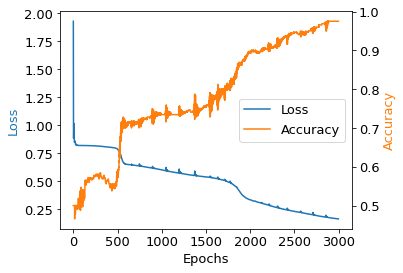

In [556]:
# define a customised neural network structure
class BDNN_random(torch.nn.Module):

    def __init__(self, n_input, n_hidden, n_output):
        super(BDNN_random, self).__init__()
        # define linear hidden layer output
        self.hidden1 = torch.nn.Linear(n_input, n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.sigmoid = torch.nn.Sigmoid()
        # define linear output layer output
        self.out = torch.nn.Linear(n_hidden, n_output)
        self.input_bias = torch.nn.Parameter(torch.randn(input_neurons))  
        self.output_bias = torch.nn.Parameter(torch.randn(output_neurons))     


    def forward(self, x):
        # get hidden layer input
        h_input1 = self.hidden1(x)
        # define activation function for hidden layer
        h_output1 = F.sigmoid(h_input1)
        # get hidden layer input
        h_input2 = self.hidden2(h_output1)
        # define activation function for hidden layer
        h_output2 = F.sigmoid(h_input2)
        # get output layer output
        y_pred = self.out(h_output2)+self.output_bias

        return y_pred
    
    def reverseforward(self, x):
        h_output=torch.matmul(x, self.out.weight)
        h = F.sigmoid(h_output)
        h_hidden2=torch.matmul(h, self.hidden2.weight)
        h = F.sigmoid(h_hidden2)
        h_input=torch.matmul(h, self.hidden1.weight)+self.input_bias
        return h_input

bdnnran = BDNN_random(input_neurons, hidden_neurons, output_neurons)
optimiserran=torch.optim.Adam(bdnnran.parameters(), lr=learning_rate,weight_decay=1e-5)

# store all losses for visualisation
bdnnran_losses = []
bdnnran_accuracy=[]
# train a neural network
for epoch in range(num_epoch):

    Y_pred = bdnnran(X)
    class_pre=Y_pred[:,0]
    extra_pre=Y_pred[:,1]
    
    # forward direction label Cross Entropy Loss
    loss1=loss_BCE(class_pre,Y_class)
    # perform backward pass
    loss1.backward(retain_graph=True)
    
    # forward direction extra nodes MSE
    loss2=loss_MSE(extra_pre,Y_node)
    # perform backward pass
    loss2.backward(retain_graph=True)
    
    # reverse direction input MSE
    X_pred = bdnnran.reverseforward(Y)
    lb = F.mse_loss(X_pred, X)
    # perform backward pass
    lb.backward()
    
    
    loss=loss1+loss2+lb
    bdnnran_losses.append(loss)
    
    # convert output of label into probability 
    predicted=F.sigmoid(Y_pred[:,0])
    result=np.round(predicted.data.numpy())
    # calculate accuracy
    total = predicted.size(0)
    correct = result== Y_class.data.numpy()
    bdnnran_accuracy.append(sum(correct)/total)
    
    
    if epoch % 200 == 0:
        # print accuracy
        print('Epoch [%d/%d] Loss: %.4f  Accuracy: %.2f %%'
              % (epoch + 1, num_epoch, loss.item(), 100 * sum(correct)/total))
        validation(bdnnran,X_val,Y_val)

    if epoch==num_epoch-1:
        print('Confusion matrix for training:')
        print(plot_confusion(X.shape[0], output_neurons, torch.from_numpy(result).long().data, Y_class.long().data))

    # Calling the step function on an Optimiser makes an update to its parameters
    optimiserran.step()
    # Clear the gradients before running the backward pass.
    bdnnran.zero_grad()
#test
plot_graph(bdnnran_losses,bdnnran_accuracy)
test(bdnnran,X_test,Y_test)

## Zero weights

Epoch [1/3000] Loss: 1.1526  Accuracy: 50.00 %
Validation Accuracy: 44.44 %
Epoch [201/3000] Loss: 0.8155  Accuracy: 51.88 %
Validation Accuracy: 58.33 %
Epoch [401/3000] Loss: 0.8119  Accuracy: 55.62 %
Validation Accuracy: 63.89 %
Epoch [601/3000] Loss: 0.7973  Accuracy: 54.06 %
Validation Accuracy: 52.78 %
Epoch [801/3000] Loss: 0.7952  Accuracy: 57.50 %
Validation Accuracy: 61.11 %
Epoch [1001/3000] Loss: 0.7833  Accuracy: 60.94 %
Validation Accuracy: 63.89 %
Epoch [1201/3000] Loss: 0.6572  Accuracy: 70.00 %
Validation Accuracy: 69.44 %
Epoch [1401/3000] Loss: 0.6339  Accuracy: 72.19 %
Validation Accuracy: 69.44 %
Epoch [1601/3000] Loss: 0.6061  Accuracy: 73.44 %
Validation Accuracy: 75.00 %
Epoch [1801/3000] Loss: 0.5862  Accuracy: 73.75 %
Validation Accuracy: 77.78 %
Epoch [2001/3000] Loss: 0.5591  Accuracy: 73.44 %
Validation Accuracy: 72.22 %
Epoch [2201/3000] Loss: 0.5348  Accuracy: 74.69 %
Validation Accuracy: 69.44 %
Epoch [2401/3000] Loss: 0.4971  Accuracy: 79.38 %
Validatio

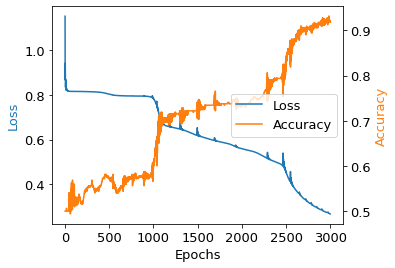

In [557]:
# define a customised neural network structure
class BDNN_zero(torch.nn.Module):

    def __init__(self, n_input, n_hidden, n_output):
        super(BDNN_zero, self).__init__()
        # define linear hidden layer output
        self.hidden1 = torch.nn.Linear(n_input, n_hidden)
        torch.nn.init.constant_(self.hidden1.weight, 0)
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        torch.nn.init.constant_(self.hidden2.weight, 0)
        self.sigmoid = torch.nn.Sigmoid()
        # define linear output layer output
        self.out = torch.nn.Linear(n_hidden, n_output)
        torch.nn.init.constant_(self.out.weight, 0)
        self.input_bias = torch.nn.Parameter(torch.randn(input_neurons))  
        torch.nn.init.constant_(self.input_bias, 0)
        self.output_bias = torch.nn.Parameter(torch.randn(output_neurons))    
        torch.nn.init.constant_(self.output_bias, 0)


    def forward(self, x):
        # get hidden layer input
        h_input1 = self.hidden1(x)
        # define activation function for hidden layer
        h_output1 = F.sigmoid(h_input1)
        # get hidden layer input
        h_input2 = self.hidden2(h_output1)
        # define activation function for hidden layer
        h_output2 = F.sigmoid(h_input2)
        # get output layer output
        y_pred = self.out(h_output2)+self.output_bias

        return y_pred
    
    def reverseforward(self, x):
        h_output=torch.matmul(x, self.out.weight)
        h = F.sigmoid(h_output)
        h_hidden2=torch.matmul(h, self.hidden2.weight)
        h = F.sigmoid(h_hidden2)
        h_input=torch.matmul(h, self.hidden1.weight)+self.input_bias
        return h_input

bdnnzero = BDNN_zero(input_neurons, hidden_neurons, output_neurons)
optimiserzero=torch.optim.Adam(bdnnzero.parameters(), lr=learning_rate,weight_decay=1e-5)
# store all losses for visualisation
bdnnzero_losses = []
bdnnzero_accuracy=[]
# train a neural network
for epoch in range(num_epoch):

    Y_pred = bdnnzero(X)
    class_pre=Y_pred[:,0]
    extra_pre=Y_pred[:,1]
    
    # forward direction label Cross Entropy Loss
    loss1=loss_BCE(class_pre,Y_class)
    # perform backward pass
    loss1.backward(retain_graph=True)
    
    # forward direction extra nodes MSE
    loss2=loss_MSE(extra_pre,Y_node)
    # perform backward pass
    loss2.backward(retain_graph=True)
    
    # reverse direction input MSE
    X_pred = bdnnzero.reverseforward(Y)
    lb = F.mse_loss(X_pred, X)
    # perform backward pass
    lb.backward()
    
    
    loss=loss1+loss2+lb
    bdnnzero_losses.append(loss)
    
    # convert output of label into probability 
    predicted=F.sigmoid(Y_pred[:,0])
    result=np.round(predicted.data.numpy())
    # calculate accuracy
    total = predicted.size(0)
    correct = result== Y_class.data.numpy()
    bdnnzero_accuracy.append(sum(correct)/total)
    
    
    if epoch % 200 == 0:
        # print accuracy
        print('Epoch [%d/%d] Loss: %.4f  Accuracy: %.2f %%'
              % (epoch + 1, num_epoch, loss.item(), 100 * sum(correct)/total))
        validation(bdnnzero,X_val,Y_val)

    if epoch==num_epoch-1:
        print('Confusion matrix for training:')
        print(plot_confusion(X.shape[0], output_neurons, torch.from_numpy(result).long().data, Y_class.long().data))

    # Calling the step function on an Optimiser makes an update to its parameters
    optimiserzero.step()
    # Clear the gradients before running the backward pass.
    bdnnzero.zero_grad()
# test
plot_graph(bdnnzero_losses,bdnnzero_accuracy)
test(bdnnzero,X_test,Y_test)

## Xavier Initialization

<ipython-input-558-acbd0e6f9e05>:14: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.out.weight, gain=1)


Epoch [1/3000] Loss: 2.0218  Accuracy: 50.00 %
Validation Accuracy: 55.56 %
Epoch [201/3000] Loss: 0.8114  Accuracy: 55.00 %
Validation Accuracy: 58.33 %
Epoch [401/3000] Loss: 0.7988  Accuracy: 56.88 %
Validation Accuracy: 47.22 %
Epoch [601/3000] Loss: 0.7926  Accuracy: 55.62 %
Validation Accuracy: 61.11 %
Epoch [801/3000] Loss: 0.6968  Accuracy: 69.06 %
Validation Accuracy: 66.67 %
Epoch [1001/3000] Loss: 0.6094  Accuracy: 72.81 %
Validation Accuracy: 77.78 %
Epoch [1201/3000] Loss: 0.5687  Accuracy: 73.44 %
Validation Accuracy: 77.78 %
Epoch [1401/3000] Loss: 0.5409  Accuracy: 75.00 %
Validation Accuracy: 77.78 %
Epoch [1601/3000] Loss: 0.5271  Accuracy: 78.12 %
Validation Accuracy: 77.78 %
Epoch [1801/3000] Loss: 0.5021  Accuracy: 78.75 %
Validation Accuracy: 75.00 %
Epoch [2001/3000] Loss: 0.4509  Accuracy: 83.44 %
Validation Accuracy: 86.11 %
Epoch [2201/3000] Loss: 0.3421  Accuracy: 89.06 %
Validation Accuracy: 94.44 %
Epoch [2401/3000] Loss: 0.3009  Accuracy: 91.25 %
Validatio

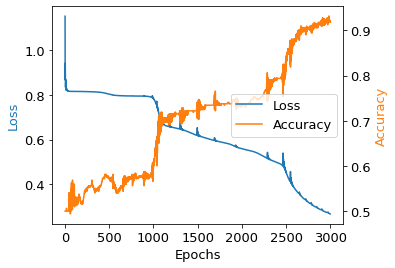

In [558]:
# define a customised neural network structure
class BDNN_xav(torch.nn.Module):

    def __init__(self, n_input, n_hidden, n_output):
        super(BDNN_xav, self).__init__()
        # define linear hidden layer output
        self.hidden1 = torch.nn.Linear(n_input, n_hidden)
        torch.nn.init.xavier_uniform_(self.hidden1.weight, gain=1)
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        torch.nn.init.xavier_uniform_(self.hidden2.weight, gain=1)
        self.sigmoid = torch.nn.Sigmoid()
        # define linear output layer output
        self.out = torch.nn.Linear(n_hidden, n_output)
        torch.nn.init.xavier_uniform(self.out.weight, gain=1)
        self.input_bias = torch.nn.Parameter(torch.randn(input_neurons))  
#         torch.nn.init.xavier_uniform(self.input_bias, gain=1)
        self.output_bias = torch.nn.Parameter(torch.randn(output_neurons))    
#         torch.nn.init.xavier_uniform(self.output_bias, gain=1)


    def forward(self, x):
        # get hidden layer input
        h_input1 = self.hidden1(x)
        # define activation function for hidden layer
        h_output1 = F.sigmoid(h_input1)
        # get hidden layer input
        h_input2 = self.hidden2(h_output1)
        # define activation function for hidden layer
        h_output2 = F.sigmoid(h_input2)
        # get output layer output
        y_pred = self.out(h_output2)+self.output_bias

        return y_pred
    
    def reverseforward(self, x):
        h_output=torch.matmul(x, self.out.weight)
        h = F.sigmoid(h_output)
        h_hidden2=torch.matmul(h, self.hidden2.weight)
        h = F.sigmoid(h_hidden2)
        h_input=torch.matmul(h, self.hidden1.weight)+self.input_bias
        return h_input

bdnnxav = BDNN_xav(input_neurons, hidden_neurons, output_neurons)
optimiserxav=torch.optim.Adam(bdnnxav.parameters(), lr=learning_rate,weight_decay=1e-5)
# store all losses for visualisation
bdnnxav_losses = []
bdnnxav_accuracy=[]
# train a neural network
for epoch in range(num_epoch):

    Y_pred = bdnnxav(X)
    class_pre=Y_pred[:,0]
    extra_pre=Y_pred[:,1]
    
    # forward direction label Cross Entropy Loss
    loss1=loss_BCE(class_pre,Y_class)
    # perform backward pass
    loss1.backward(retain_graph=True)
    
    # forward direction extra nodes MSE
    loss2=loss_MSE(extra_pre,Y_node)
    # perform backward pass
    loss2.backward(retain_graph=True)
    
    # reverse direction input MSE
    X_pred = bdnnxav.reverseforward(Y)
    lb = F.mse_loss(X_pred, X)
    # perform backward pass
    lb.backward()
    
    
    loss=loss1+loss2+lb
    bdnnxav_losses.append(loss)
    
    # convert output of label into probability 
    predicted=F.sigmoid(Y_pred[:,0])
    result=np.round(predicted.data.numpy())
    # calculate accuracy
    total = predicted.size(0)
    correct = result== Y_class.data.numpy()
    bdnnxav_accuracy.append(sum(correct)/total)
    
    
    if epoch % 200 == 0:
        # print accuracy
        print('Epoch [%d/%d] Loss: %.4f  Accuracy: %.2f %%'
              % (epoch + 1, num_epoch, loss.item(), 100 * sum(correct)/total))
        validation(bdnnxav,X_val,Y_val)

    if epoch==num_epoch-1:
        print('Confusion matrix for training:')
        print(plot_confusion(X.shape[0], output_neurons, torch.from_numpy(result).long().data, Y_class.long().data))

    # Calling the step function on an Optimiser makes an update to its parameters
    optimiserxav.step()
    # Clear the gradients before running the backward pass.
    bdnnxav.zero_grad()
# test
plot_graph(bdnnzero_losses,bdnnzero_accuracy)
test(bdnnxav,X_test,Y_test)

## GA-optimized BDNN (Model in the paper)

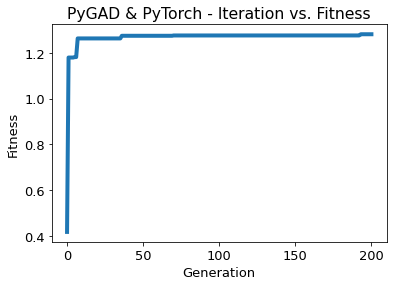

Fitness value of the best solution = 1.2813041430362764
Index of the best solution : 0
Epoch [1/3000] Loss: 10.7614  Accuracy: 55.00 %
Validation Accuracy: 47.22 %
Epoch [201/3000] Loss: 0.7882  Accuracy: 57.19 %
Validation Accuracy: 61.11 %
Epoch [401/3000] Loss: 0.6472  Accuracy: 71.25 %
Validation Accuracy: 75.00 %
Epoch [601/3000] Loss: 0.5897  Accuracy: 73.44 %
Validation Accuracy: 77.78 %
Epoch [801/3000] Loss: 0.5544  Accuracy: 75.31 %
Validation Accuracy: 83.33 %
Epoch [1001/3000] Loss: 0.5279  Accuracy: 78.12 %
Validation Accuracy: 83.33 %
Epoch [1201/3000] Loss: 0.4762  Accuracy: 81.25 %
Validation Accuracy: 86.11 %
Epoch [1401/3000] Loss: 0.3469  Accuracy: 88.75 %
Validation Accuracy: 91.67 %
Epoch [1601/3000] Loss: 0.2813  Accuracy: 92.50 %
Validation Accuracy: 94.44 %
Epoch [1801/3000] Loss: 0.2525  Accuracy: 92.50 %
Validation Accuracy: 94.44 %
Epoch [2001/3000] Loss: 0.2293  Accuracy: 93.44 %
Validation Accuracy: 94.44 %
Epoch [2201/3000] Loss: 0.2085  Accuracy: 94.06 %


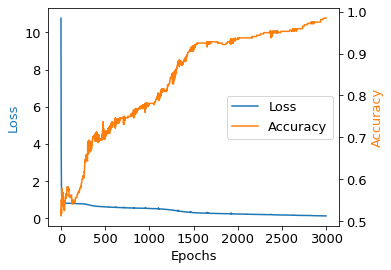

In [659]:
# define a customised neural network structure
class BDNN(torch.nn.Module):

    def __init__(self, n_input, n_hidden, n_output):
        super(BDNN, self).__init__()
        # define linear hidden layer output
        self.hidden1 = torch.nn.Linear(n_input, n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.sigmoid = torch.nn.Sigmoid()
        # define linear output layer output
        self.out = torch.nn.Linear(n_hidden, n_output)
        self.input_bias = torch.nn.Parameter(torch.randn(input_neurons))  
        self.output_bias = torch.nn.Parameter(torch.randn(output_neurons))     


    def forward(self, x):
        # get hidden layer input
        h_input1 = self.hidden1(x)
        # define activation function for hidden layer
        h_output1 = F.sigmoid(h_input1)
        # get hidden layer input
        h_input2 = self.hidden2(h_output1)
        # define activation function for hidden layer
        h_output2 = F.sigmoid(h_input2)
        # get output layer output
        y_pred = self.out(h_output2)+self.output_bias

        return y_pred
    
    def reverseforward(self, x):
        h_output=torch.matmul(x, self.out.weight)
        h = F.sigmoid(h_output)
        h_hidden2=torch.matmul(h, self.hidden2.weight)
        h = F.sigmoid(h_hidden2)
        h_input=torch.matmul(h, self.hidden1.weight)+self.input_bias
        return h_input



def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function1,loss_function2

    model_weights_dict = torchga.model_weights_as_dict(model=model,
                                                       weights_vector=solution)

    model.load_state_dict(model_weights_dict)
    predictions = model(data_inputs)
    
    # loss BCE
    loss1=loss_function1(predictions[:,0], data_outputs[:,0]).detach().numpy()
    # loss MSE
    loss2=loss_function2(predictions[:,1], data_outputs[:,1]).detach().numpy()
    solution_fitness = 1.0 / ( loss1+loss2 + 0.00000001)

    return solution_fitness

# bdnn model initialization
model=BDNN(input_neurons, hidden_neurons, output_neurons)

# Create an instance of the pygad.torchga.TorchGA class to build the initial population.
torch_ga = torchga.TorchGA(model=model,
                           num_solutions=10)

loss_function1 = torch.nn.BCEWithLogitsLoss()
loss_function2 = torch.nn.MSELoss()


data_inputs=X
data_outputs=Y

# Prepare the PyGAD parameters
num_generations = 200 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool
initial_population = torch_ga.population_weights # Initial population of network weights
parent_selection_type = "sss" # Type of parent selection
crossover_type = "single_point" # Type of the crossover operator
mutation_type = "random" # Type of the mutation operator
mutation_percent_genes = 10# Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.
keep_parents = -1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.
# print(initial_population)
# Create an instance of the pygad.GA class
ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       keep_parents=keep_parents)

# Start the genetic algorithm evolution.
ga_instance.run()
# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = torchga.model_weights_as_dict(model=model,
                                                      weights_vector=solution)
model.load_state_dict(best_solution_weights)

#1
optimisergabdnn_init=torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=2e-5)
# store all losses for visualisation
ga_init_losses = []
ga_init_accuracy=[]
# train a neural network
for epoch in range(num_epoch):

    Y_pred = model(X)
    class_pre=Y_pred[:,0]
    extra_pre=Y_pred[:,1]
    
    # forward direction label Cross Entropy Loss
    loss1=loss_BCE(class_pre,Y_class)
    # perform backward pass
    loss1.backward(retain_graph=True)
    
    # forward direction extra nodes MSE
    loss2=loss_MSE(extra_pre,Y_node)
    # perform backward pass
    loss2.backward(retain_graph=True)
    
    # reverse direction input MSE
    X_pred = model.reverseforward(Y)
    lb = F.mse_loss(X_pred, X)
    # perform backward pass
    lb.backward()
    
    loss=loss1+loss2+lb
    ga_init_losses.append(loss)
    
    # convert output of label into probability 
    predicted=F.sigmoid(Y_pred[:,0])
    result=np.round(predicted.data.numpy())
    # calculate accuracy
    total = predicted.size(0)
    correct = result== Y_class.data.numpy()
    ga_init_accuracy.append(sum(correct)/total)
    
    
    if epoch % 200 == 0:
        # print accuracy
        print('Epoch [%d/%d] Loss: %.4f  Accuracy: %.2f %%'
              % (epoch + 1, num_epoch, loss.item(), 100 * sum(correct)/total))
        validation(model,X_val,Y_val)
    if epoch==num_epoch-1:
        print('Confusion matrix for training:')
        print(plot_confusion(X.shape[0], output_neurons, torch.from_numpy(result).long().data, Y_class.long().data))

    # Calling the step function on an Optimiser makes an update to its parameters
    optimisergabdnn_init.step()
    # Clear the gradients before running the backward pass.
    model.zero_grad()
plot_graph(ga_init_losses,ga_init_accuracy)
test(model,X_test,Y_test)

## GA-optimized BDNN (Model in this paper)

### Stage 1: GA optimises BDNN weights and biases

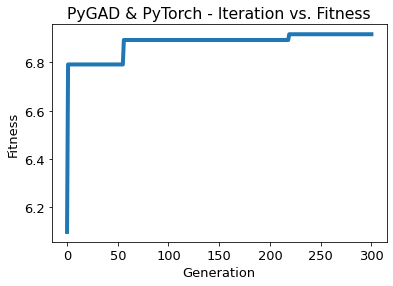

Fitness value of the best solution = 6.9168732573380565
Index of the best solution : 0
Epoch [1/3000] Loss: 4.7596  Accuracy: 50.00 %
Validation Accuracy: 44.44 %
Epoch [201/3000] Loss: 0.7895  Accuracy: 56.25 %
Validation Accuracy: 61.11 %
Epoch [401/3000] Loss: 0.6325  Accuracy: 71.56 %
Validation Accuracy: 77.78 %
Epoch [601/3000] Loss: 0.5815  Accuracy: 72.81 %
Validation Accuracy: 80.56 %
Epoch [801/3000] Loss: 0.5536  Accuracy: 73.12 %
Validation Accuracy: 80.56 %
Epoch [1001/3000] Loss: 0.5423  Accuracy: 73.44 %
Validation Accuracy: 75.00 %
Epoch [1201/3000] Loss: 0.5325  Accuracy: 75.62 %
Validation Accuracy: 77.78 %
Epoch [1401/3000] Loss: 0.5222  Accuracy: 75.00 %
Validation Accuracy: 77.78 %
Epoch [1601/3000] Loss: 0.5086  Accuracy: 76.56 %
Validation Accuracy: 77.78 %
Epoch [1801/3000] Loss: 0.4916  Accuracy: 77.50 %
Validation Accuracy: 77.78 %
Epoch [2001/3000] Loss: 0.4726  Accuracy: 77.50 %
Validation Accuracy: 75.00 %
Epoch [2201/3000] Loss: 0.4475  Accuracy: 80.31 %
V

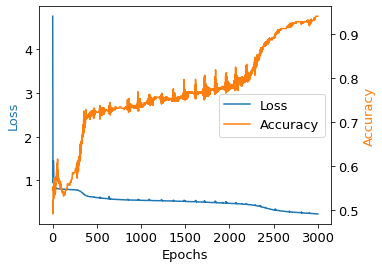

In [660]:
# define a customised neural network structure
class BDNN(torch.nn.Module):

    def __init__(self, n_input, n_hidden, n_output):
        super(BDNN, self).__init__()
        # define linear hidden layer output
        self.hidden1 = torch.nn.Linear(n_input, n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.sigmoid = torch.nn.Sigmoid()
        # define linear output layer output
        self.out = torch.nn.Linear(n_hidden, n_output)
        self.input_bias = torch.nn.Parameter(torch.randn(input_neurons))  
        self.output_bias = torch.nn.Parameter(torch.randn(output_neurons))     

    def forward(self, x):
        # get hidden layer input
        h_input1 = self.hidden1(x)
        # define activation function for hidden layer
        h_output1 = F.sigmoid(h_input1)
        # get hidden layer input
        h_input2 = self.hidden2(h_output1)
        # define activation function for hidden layer
        h_output2 = F.sigmoid(h_input2)
        # get output layer output
        y_pred = self.out(h_output2)+self.output_bias

        return y_pred
    
    def reverseforward(self, x):
        h_output=torch.matmul(x, self.out.weight)
        h = F.sigmoid(h_output)
        h_hidden2=torch.matmul(h, self.hidden2.weight)
        h = F.sigmoid(h_hidden2)
        h_input=torch.matmul(h, self.hidden1.weight)+self.input_bias
        return h_input



def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function1,loss_function2

    model_weights_dict = torchga.model_weights_as_dict(model=model,
                                                       weights_vector=solution)

    model.load_state_dict(model_weights_dict)
    predictions = model(data_inputs)
    
    # loss BCE
    loss1=loss_function1(predictions[:,0], data_outputs[:,0]).detach().numpy()*0.1
    # loss MSE
    loss2=loss_function2(predictions[:,1], data_outputs[:,1]).detach().numpy()*0.9
    solution_fitness = 1.0 / ( loss1+loss2 + 0.00000001)

    return solution_fitness

# bdnn model initialization
model=BDNN(input_neurons, hidden_neurons, output_neurons)

# Create an instance of the pygad.torchga.TorchGA class to build the initial population.
torch_ga = torchga.TorchGA(model=model,
                           num_solutions=8)

loss_function1 = torch.nn.BCEWithLogitsLoss()
loss_function2 = torch.nn.MSELoss()

data_inputs=X
data_outputs=Y
# Prepare the PyGAD parameters
num_generations = 300 # Number of generations.
num_parents_mating = 4 # Number of solutions to be selected as parents in the mating pool
initial_population = torch_ga.population_weights # Initial population of network weights
parent_selection_type = "sss" # Type of parent selection
crossover_type = "single_point" # Type of the crossover operator
crossover_probability=0.8 # The probability of crossover operator
mutation_type = "random" # Type of the mutation operator
mutation_percent_genes = 10# Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.
keep_parents = -1 # Number of parents to keep in the next population. -1 means keep all parents 

# Create an instance of the pygad.GA class
ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       crossover_probability=crossover_probability,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       keep_parents=keep_parents)

# Start the genetic algorithm evolution.
ga_instance.run()
# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = torchga.model_weights_as_dict(model=model,
                                                      weights_vector=solution)
model.load_state_dict(best_solution_weights)


### Stage 2: BDNN fine-tuning
optimisergabdnn=torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=2e-5)
# store all losses for visualisation
ga_losses = []
ga_accuracy=[]
# train a neural network
for epoch in range(num_epoch):

    Y_pred = model(X)
    class_pre=Y_pred[:,0]
    extra_pre=Y_pred[:,1]
    
    # forward direction label Cross Entropy Loss
    loss1=loss_BCE(class_pre,Y_class)
    # perform backward pass
    loss1.backward(retain_graph=True)
    
    # forward direction extra nodes MSE
    loss2=loss_MSE(extra_pre,Y_node)
    # perform backward pass
    loss2.backward(retain_graph=True)
    
    # reverse direction input MSE
    X_pred = model.reverseforward(Y)
    lb = F.mse_loss(X_pred, X)
    # perform backward pass
    lb.backward()
    
    loss=loss1+loss2+lb
    ga_losses.append(loss)
    
    # convert output of label into probability 
    predicted=F.sigmoid(Y_pred[:,0])
    result=np.round(predicted.data.numpy())
    # calculate accuracy
    total = predicted.size(0)
    correct = result== Y_class.data.numpy()
    ga_accuracy.append(sum(correct)/total)
    
    
    if epoch % 200 == 0:
        # print accuracy
        print('Epoch [%d/%d] Loss: %.4f  Accuracy: %.2f %%'
              % (epoch + 1, num_epoch, loss.item(), 100 * sum(correct)/total))
        validation(model,X_val,Y_val)
    if epoch==num_epoch-1:
        print('Confusion matrix for training:')
        print(plot_confusion(X.shape[0], output_neurons, torch.from_numpy(result).long().data, Y_class.long().data))

    # Calling the step function on an Optimiser makes an update to its parameters
    optimisergabdnn.step()
    # Clear the gradients before running the backward pass.
    model.zero_grad()

## Test the GA-optimized BDNN
# Pass testing data to the built neural network and get its performance    
plot_graph(ga_losses,ga_accuracy)
test(model,X_test,Y_test)

## GA-optimized BDNN VS BDNN

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


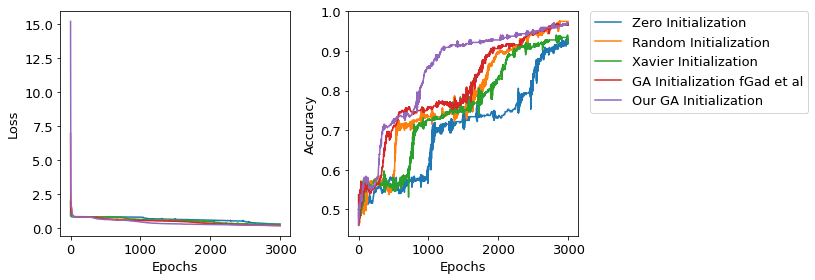

In [638]:
plot_comparison(bdnnzero_losses,bdnnran_losses,bdnnxav_losses,ga_init_losses,ga_losses,\
                bdnnzero_accuracy,bdnnran_accuracy,bdnnxav_accuracy,ga_init_accuracy,ga_accuracy)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


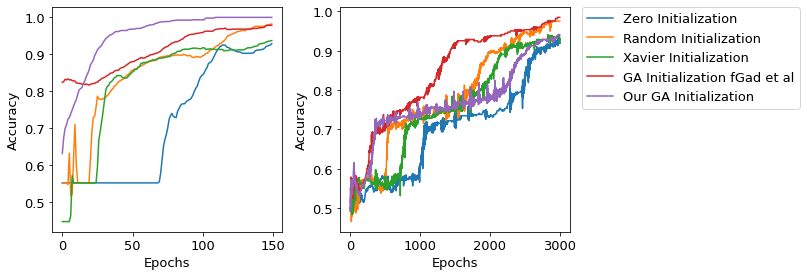

In [663]:
plot_weightinit_acc_comparison(bdnnzero_acc_bank,bdnnran_acc_bank,bdnnxav_acc_bank,ga_init_acc_bank,ga_acc_bank,bdnnzero_accuracy,bdnnran_accuracy,bdnnxav_accuracy,ga_init_accuracy,ga_accuracy)

In [658]:
# define a function to plot confusion matrix
def plot_confusion(input_sample, num_classes, des_output, actual_output):
    confusion = torch.zeros(num_classes, num_classes)
    for i in range(input_sample):
        actual_class = actual_output[i]
        predicted_class = des_output[i]
        confusion[actual_class][predicted_class] += 1
    return confusion


# plot model accuracy comparison graph
def plot_comparison_acc(accuracy1,accuracy2):
    plt.figure()
    host = host_subplot(111)  
    plt.subplots_adjust(right=0.8)

    host.set_xlabel("Epochs")
    host.set_ylabel("Accuracy")

    # plot curves
    p2, = host.plot(range(len(accuracy1)), accuracy1, label="GA-BDNN Accuracy")
    p4, = host.plot(range(len(accuracy2)), accuracy2, label="BDNN Accuracy")

    # set location of the legend
    host.legend(loc=4)

    # set label color
    host.axis["left"].label.set_color(p2.get_color())

    plt.draw()
    plt.savefig('comparison-acc.eps',dpi=300,format='eps')

    
# plot model loss comparison graph
def plot_comparison_loss(losses1,losses2):
    plt.figure()  
    host = host_subplot(111)  
    plt.subplots_adjust(right=0.8)


    host.set_xlabel("Epochs")#,fontsize=15)
    host.set_ylabel("Loss")#,fontsize=15)

    # plot curves
    p1, = host.plot(range(len(losses1)), losses1, label="GA-BDNN Loss")
    p3, = host.plot(range(len(losses2)), losses2, label="BDNN Loss")

    # set location of the legend
    host.legend(loc=5)

    # set label color
    host.axis["left"].label.set_color(p1.get_color())


    plt.draw()
    plt.savefig('comparison-loss.eps',dpi=300,format='eps')
    
# plot model accuracy vs loss graph 
def plot_graph(all_losses,all_accuracy):
    plt.figure()
    host = host_subplot(111)  
    plt.subplots_adjust(right=0.8)
    par1 = host.twinx()  

    host.set_xlabel("Epochs")
    host.set_ylabel("Loss")
    par1.set_ylabel("Accuracy")

    # plot curves
    p1, = host.plot(range(len(all_losses)), all_losses, label="Loss")
    p2, = par1.plot(range(len(all_accuracy)), all_accuracy, label="Accuracy")

    # set location of the legend
    host.legend(loc=5)

    # set label color
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())

    plt.draw()
    # plt.savefig("accuracy-vs-loss.jpg")

# validation Accuracy    
def validation(net,val_X,val_Y):
    Y_val_class=Y_val[:,0]
    Y_val_node=Y_val[:,1]
    
    outputs = net(val_X)
    predicted=outputs[:,0]
    predicted=F.sigmoid(predicted)

    total = predicted.size(0)
    result=np.round(predicted.data.numpy())

    correct = result == Y_val_class.data.numpy()

    print('Validation Accuracy: %.2f %%' % (100 * sum(correct)/total))

# testing result
def test(net,X_test,Y_test):
    outputs = net(X_test)
    predicted=F.sigmoid(outputs[:,0])
    total = predicted.size(0)
    result=np.round(predicted.data.numpy())

    correct = result == Y_test[:,0].data.numpy()
    print('Testing Accuracy: %.2f %%' % (100 * sum(correct)/total))

    # Evaluating the Results
    print('Confusion matrix for testing:')
    print(plot_confusion(X_test.shape[0], output_neurons, torch.from_numpy(result).long().data, Y_test[:,0].long().data))
    
    
def plot_test(losses1,losses2,accuracy1,accuracy2):
#     plt.figure()
#     fig, (ax1, ax2)=plt.subplot(1,2,1)
#     fig, (host, host1) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)
#     host = host_subplot(121)  
#     plt.subplots_adjust(right=0.8)
    host = plt.subplot(121)
    host.set_xlabel("Epochs")#,fontsize=15)
    host.set_ylabel("Loss")#,fontsize=15)
#     host.set_ylim([0,6])
    # plot curves
    p1, = host.plot(range(len(losses1)), losses1, label="GA-BDNN Loss")
    p3, = host.plot(range(len(losses2)), losses2, label="BDNN Loss")
    # set location of the legend
    host.legend(loc=5)

    # set label color
#     host.axis["left"].label.set_color(p1.get_color())
    
    
#     plt.subplot(1,2,2)
#     host1 = host_subplot(122)  
#     plt.subplots_adjust(right=0.8)
    host1 = plt.subplot(122)
    host1.set_xlabel("Epochs")
    host1.set_ylabel("Accuracy")
#     host1.ylim(0,1)
#     host1.set_ylim([0,1])
    # plot curves
    p2, = host1.plot(range(len(accuracy1)), accuracy1, label="GA-BDNN Accuracy")
    p4, = host1.plot(range(len(accuracy2)), accuracy2, label="BDNN Accuracy")

    # set location of the legend
    host1.legend(loc=4)

    # set label color
#     host1.axis["left"].label.set_color(p2.get_color())
#     plt.subplots_adjust(bottom=0.15,wspace=1)
    plt.subplots_adjust(left=-0.5, wspace=0.25, hspace=0.25,
                    bottom=0.13, top=0.91)
    plt.savefig('comparison.eps',dpi=600,bbox_inches='tight',format='eps')
    plt.show()
    
def plot_comparison(bdnnzero_losses,bdnnran_losses,bdnnxav_losses,ga_init_losses,ga_losses,\
                    bdnnzero_accuracy,bdnnran_accuracy,bdnnxav_accuracy,ga_init_accuracy,ga_accuracy):
    host = plt.subplot(121)
    host.set_xlabel("Epochs")#,fontsize=15)
    host.set_ylabel("Loss")#,fontsize=15)
    p1, = host.plot(range(len(bdnnzero_losses)), bdnnzero_losses, label="Zero Initialization")
    p3, = host.plot(range(len(bdnnran_losses)), bdnnran_losses, label="Random Initialization")
    p5, = host.plot(range(len(bdnnxav_losses)), bdnnxav_losses, label="Xavier Initialization")
    p7, = host.plot(range(len(ga_init_losses)), ga_init_losses, label="GA Initialization from Gad et al")
    p9, = host.plot(range(len(ga_losses)), ga_losses, label="Our GA Initialization")
    # set location of the legend

    host1 = plt.subplot(122)
    host1.set_xlabel("Epochs")
    host1.set_ylabel("Accuracy")

    # plot curves
    p2, = host1.plot(range(len(bdnnzero_accuracy)), bdnnzero_accuracy, label="Zero Initialization")
    p4, = host1.plot(range(len(bdnnran_accuracy)), bdnnran_accuracy, label="Random Initialization")
    p6, = host1.plot(range(len(bdnnxav_accuracy)), bdnnxav_accuracy, label="Xavier Initialization")
    p8, = host1.plot(range(len(ga_init_accuracy)), ga_init_accuracy, label="GA Initialization fGad et al")
    p10, = host1.plot(range(len(ga_accuracy)), ga_accuracy, label="Our GA Initialization")

    # set location of the legend
    host1.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

    plt.subplots_adjust(left=-0.3, wspace=0.25, hspace=0.25,
                    bottom=0.13, top=0.91)
    plt.savefig('comparison_wieght_initalization.eps',dpi=600,bbox_inches='tight',format='eps')
    plt.show()
    
def plot_weightinit_acc_comparison(bdnnzero_acc_bank,bdnnran_acc_bank,bdnnxav_acc_bank,ga_init_acc_bank,ga_acc_bank,
                                   bdnnzero_accuracy,bdnnran_accuracy,bdnnxav_accuracy,ga_init_accuracy,ga_accuracy):
    host = plt.subplot(121)
    host.set_xlabel("Epochs")#,fontsize=15)
    host.set_ylabel("Accuracy")#,fontsize=15)
    p1, = host.plot(range(len(bdnnzero_acc_bank)), bdnnzero_acc_bank, label="Zero Initialization")
    p3, = host.plot(range(len(bdnnran_acc_bank)), bdnnran_acc_bank, label="Random Initialization")
    p5, = host.plot(range(len(bdnnxav_acc_bank)), bdnnxav_acc_bank, label="Xavier Initialization")
    p7, = host.plot(range(len(ga_init_acc_bank)), ga_init_acc_bank, label="GA Initialization from Gad et al")
    p9, = host.plot(range(len(ga_acc_bank)), ga_acc_bank, label="Our GA Initialization")
    # set location of the legend

    host1 = plt.subplot(122)
    host1.set_xlabel("Epochs")
    host1.set_ylabel("Accuracy")

    # plot curves
    p2, = host1.plot(range(len(bdnnzero_accuracy)), bdnnzero_accuracy, label="Zero Initialization")
    p4, = host1.plot(range(len(bdnnran_accuracy)), bdnnran_accuracy, label="Random Initialization")
    p6, = host1.plot(range(len(bdnnxav_accuracy)), bdnnxav_accuracy, label="Xavier Initialization")
    p8, = host1.plot(range(len(ga_init_accuracy)), ga_init_accuracy, label="GA Initialization fGad et al")
    p10, = host1.plot(range(len(ga_accuracy)), ga_accuracy, label="Our GA Initialization")

    # set location of the legend
    host1.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

    plt.subplots_adjust(left=-0.3, wspace=0.25, hspace=0.25,
                    bottom=0.13, top=0.91)
    plt.savefig('comparison_wieght_initalization.eps',dpi=600,bbox_inches='tight',format='eps')
    plt.show()    


In [661]:
bdnnzero_acc_bank=[0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5551401869158878, 0.5794392523364486, 0.616822429906542, 0.6514018691588785, 0.6700934579439253, 0.6831775700934579, 0.7009345794392523, 0.7242990654205608, 0.7345794392523365, 0.7401869158878505, 0.7317757009345794, 0.7299065420560747, 0.7289719626168224, 0.7457943925233644, 0.7532710280373832, 0.7607476635514019, 0.7654205607476635, 0.7663551401869159, 0.7663551401869159, 0.7710280373831776, 0.7747663551401869, 0.7766355140186916, 0.7785046728971963, 0.7831775700934579, 0.7906542056074767, 0.8009345794392523, 0.8084112149532711, 0.814018691588785, 0.8261682242990654, 0.8364485981308412, 0.8420560747663551, 0.8448598130841122, 0.8504672897196262, 0.8588785046728972, 0.8644859813084113, 0.8757009345794392, 0.8775700934579439, 0.8803738317757009, 0.8869158878504673, 0.8943925233644859, 0.902803738317757, 0.9093457943925234, 0.914018691588785, 0.9205607476635514, 0.922429906542056, 0.9252336448598131, 0.9252336448598131, 0.9242990654205607, 0.9196261682242991, 0.9186915887850468, 0.9168224299065421, 0.914018691588785, 0.9130841121495327, 0.9112149532710281, 0.9093457943925234, 0.9074766355140187, 0.9065420560747663, 0.9065420560747663, 0.905607476635514, 0.902803738317757, 0.902803738317757, 0.902803738317757, 0.902803738317757, 0.902803738317757, 0.902803738317757, 0.902803738317757, 0.9037383177570093, 0.9037383177570093, 0.908411214953271, 0.9112149532710281, 0.9112149532710281, 0.9121495327102803, 0.9121495327102803, 0.9130841121495327, 0.914018691588785, 0.9168224299065421, 0.9214953271028037, 0.922429906542056, 0.9242990654205607, 0.9252336448598131, 0.9289719626168225]
bdnnran_acc_bank=[0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5476635514018692, 0.6327102803738318, 0.5177570093457944, 0.5205607476635514, 0.6177570093457944, 0.7102803738317757, 0.597196261682243, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.6158878504672897, 0.6878504672897197, 0.7299065420560747, 0.7317757009345794, 0.7570093457943925, 0.7869158878504673, 0.7794392523364486, 0.7785046728971963, 0.7785046728971963, 0.7794392523364486, 0.7822429906542057, 0.7841121495327102, 0.788785046728972, 0.791588785046729, 0.7981308411214953, 0.8037383177570093, 0.8065420560747664, 0.814018691588785, 0.8158878504672897, 0.8214953271028037, 0.8252336448598131, 0.8280373831775701, 0.8308411214953271, 0.8317757009345794, 0.8355140186915888, 0.8401869158878504, 0.8439252336448598, 0.8457943925233645, 0.8495327102803738, 0.8551401869158879, 0.8570093457943925, 0.8598130841121495, 0.8607476635514019, 0.8616822429906542, 0.8654205607476636, 0.8672897196261682, 0.8682242990654205, 0.8710280373831776, 0.8719626168224299, 0.8757009345794392, 0.8766355140186916, 0.8785046728971962, 0.8813084112149533, 0.8813084112149533, 0.8822429906542056, 0.883177570093458, 0.883177570093458, 0.8850467289719626, 0.8869158878504673, 0.891588785046729, 0.8925233644859814, 0.8934579439252337, 0.8943925233644859, 0.8943925233644859, 0.8953271028037383, 0.8962616822429906, 0.8962616822429906, 0.8943925233644859, 0.897196261682243, 0.8962616822429906, 0.8981308411214953, 0.8981308411214953, 0.8981308411214953, 0.8981308411214953, 0.8981308411214953, 0.897196261682243, 0.9, 0.8990654205607477, 0.8981308411214953, 0.8962616822429906, 0.8962616822429906, 0.897196261682243, 0.8934579439252337, 0.891588785046729, 0.891588785046729, 0.8943925233644859, 0.8934579439252337, 0.8934579439252337, 0.891588785046729, 0.8934579439252337, 0.8962616822429906, 0.8981308411214953, 0.9018691588785047, 0.902803738317757, 0.9065420560747663, 0.9112149532710281, 0.9121495327102803, 0.9130841121495327, 0.9177570093457944, 0.9205607476635514, 0.9233644859813084, 0.9242990654205607, 0.9289719626168225, 0.9299065420560748, 0.9336448598130841, 0.9364485981308411, 0.9401869158878504, 0.9467289719626168, 0.9504672897196261, 0.9523364485981308, 0.9532710280373832, 0.9551401869158879, 0.9570093457943926, 0.9579439252336449, 0.9607476635514018, 0.9616822429906542, 0.9626168224299065, 0.9635514018691589, 0.9644859813084112, 0.9654205607476636, 0.9635514018691589, 0.9663551401869159, 0.9682242990654205, 0.9682242990654205, 0.9700934579439252, 0.9710280373831776, 0.9728971962616823, 0.9757009345794393, 0.9757009345794393, 0.9757009345794393, 0.9757009345794393, 0.9757009345794393, 0.9757009345794393, 0.9757009345794393, 0.9766355140186916, 0.9766355140186916, 0.9794392523364486, 0.9794392523364486, 0.9813084112149533, 0.9822429906542056]
bdnnxav_acc_bank=[0.44766355140186914, 0.44766355140186914, 0.44766355140186914, 0.44766355140186914, 0.44766355140186914, 0.44766355140186914, 0.4635514018691589, 0.5719626168224299, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5523364485981308, 0.5953271028037384, 0.6691588785046729, 0.6915887850467289, 0.7177570093457943, 0.7448598130841122, 0.7757009345794392, 0.8046728971962617, 0.8130841121495327, 0.8158878504672897, 0.8242990654205608, 0.8261682242990654, 0.8308411214953271, 0.8364485981308412, 0.8383177570093457, 0.8429906542056075, 0.8420560747663551, 0.8429906542056075, 0.8411214953271028, 0.8364485981308412, 0.8364485981308412, 0.8355140186915888, 0.8364485981308412, 0.8411214953271028, 0.8448598130841122, 0.8485981308411215, 0.8523364485981308, 0.8551401869158879, 0.8598130841121495, 0.8598130841121495, 0.8644859813084113, 0.8672897196261682, 0.8757009345794392, 0.8757009345794392, 0.8785046728971962, 0.8775700934579439, 0.8785046728971962, 0.8803738317757009, 0.8813084112149533, 0.8822429906542056, 0.8850467289719626, 0.8850467289719626, 0.8850467289719626, 0.8869158878504673, 0.888785046728972, 0.8897196261682243, 0.8897196261682243, 0.8897196261682243, 0.8906542056074767, 0.891588785046729, 0.8925233644859814, 0.8934579439252337, 0.8934579439252337, 0.8981308411214953, 0.9009345794392524, 0.9018691588785047, 0.902803738317757, 0.9046728971962616, 0.908411214953271, 0.908411214953271, 0.908411214953271, 0.9121495327102803, 0.9130841121495327, 0.914018691588785, 0.914018691588785, 0.914018691588785, 0.914018691588785, 0.9149532710280374, 0.9158878504672897, 0.9168224299065421, 0.9168224299065421, 0.9168224299065421, 0.9158878504672897, 0.9158878504672897, 0.9149532710280374, 0.9158878504672897, 0.9177570093457944, 0.9177570093457944, 0.9130841121495327, 0.914018691588785, 0.914018691588785, 0.9149532710280374, 0.914018691588785, 0.914018691588785, 0.914018691588785, 0.9130841121495327, 0.9130841121495327, 0.914018691588785, 0.9130841121495327, 0.9130841121495327, 0.9130841121495327, 0.9093457943925234, 0.9102803738317757, 0.9102803738317757, 0.9102803738317757, 0.9121495327102803, 0.9121495327102803, 0.9121495327102803, 0.9112149532710281, 0.9112149532710281, 0.9112149532710281, 0.9121495327102803, 0.9121495327102803, 0.9121495327102803, 0.9121495327102803, 0.9121495327102803, 0.914018691588785, 0.9158878504672897, 0.9177570093457944, 0.9177570093457944, 0.9177570093457944, 0.9186915887850468, 0.9205607476635514, 0.9214953271028037, 0.922429906542056, 0.9233644859813084, 0.9280373831775701, 0.9289719626168225, 0.9289719626168225, 0.9299065420560748, 0.930841121495327, 0.9336448598130841, 0.9345794392523364, 0.9355140186915888, 0.9364485981308411, 0.9373831775700935]
ga_init_acc_bank=[0.8242990654205608, 0.8261682242990654, 0.8327102803738318, 0.8308411214953271, 0.8336448598130841, 0.8308411214953271, 0.8317757009345794, 0.8289719626168224, 0.8280373831775701, 0.8280373831775701, 0.822429906542056, 0.822429906542056, 0.8214953271028037, 0.8205607476635514, 0.819626168224299, 0.819626168224299, 0.8186915887850468, 0.819626168224299, 0.8186915887850468, 0.8168224299065421, 0.8186915887850468, 0.8205607476635514, 0.8205607476635514, 0.8214953271028037, 0.8242990654205608, 0.8242990654205608, 0.8289719626168224, 0.8308411214953271, 0.8345794392523365, 0.8364485981308412, 0.8373831775700935, 0.8401869158878504, 0.8429906542056075, 0.8448598130841122, 0.8485981308411215, 0.8495327102803738, 0.8504672897196262, 0.8542056074766355, 0.8560747663551402, 0.8570093457943925, 0.8570093457943925, 0.8616822429906542, 0.8635514018691589, 0.8644859813084113, 0.8663551401869158, 0.8691588785046729, 0.8719626168224299, 0.874766355140187, 0.8775700934579439, 0.8794392523364486, 0.8803738317757009, 0.8803738317757009, 0.883177570093458, 0.8850467289719626, 0.8869158878504673, 0.888785046728972, 0.891588785046729, 0.8897196261682243, 0.8897196261682243, 0.8906542056074767, 0.8943925233644859, 0.8943925233644859, 0.897196261682243, 0.8990654205607477, 0.8990654205607477, 0.9009345794392524, 0.9018691588785047, 0.902803738317757, 0.9046728971962616, 0.9065420560747663, 0.908411214953271, 0.9130841121495327, 0.9158878504672897, 0.9186915887850468, 0.9205607476635514, 0.9214953271028037, 0.9252336448598131, 0.9271028037383178, 0.930841121495327, 0.930841121495327, 0.9336448598130841, 0.9336448598130841, 0.9345794392523364, 0.9364485981308411, 0.9383177570093458, 0.9411214953271028, 0.9420560747663551, 0.9467289719626168, 0.9485981308411215, 0.9504672897196261, 0.9523364485981308, 0.9532710280373832, 0.9542056074766355, 0.9542056074766355, 0.9551401869158879, 0.9560747663551402, 0.9570093457943926, 0.9570093457943926, 0.9579439252336449, 0.9588785046728971, 0.9588785046728971, 0.9616822429906542, 0.9626168224299065, 0.9626168224299065, 0.9626168224299065, 0.9626168224299065, 0.9626168224299065, 0.9626168224299065, 0.9654205607476636, 0.9672897196261683, 0.9682242990654205, 0.9682242990654205, 0.9691588785046729, 0.9691588785046729, 0.9691588785046729, 0.9700934579439252, 0.9710280373831776, 0.9672897196261683, 0.9672897196261683, 0.9672897196261683, 0.9672897196261683, 0.9682242990654205, 0.9682242990654205, 0.9682242990654205, 0.9682242990654205, 0.9682242990654205, 0.9682242990654205, 0.9682242990654205, 0.9682242990654205, 0.9682242990654205, 0.9682242990654205, 0.9682242990654205, 0.9682242990654205, 0.9682242990654205, 0.9682242990654205, 0.9691588785046729, 0.9700934579439252, 0.9700934579439252, 0.9700934579439252, 0.9700934579439252, 0.9719626168224299, 0.9719626168224299, 0.9719626168224299, 0.9728971962616823, 0.9738317757009346, 0.9785046728971962, 0.9785046728971962, 0.9785046728971962, 0.9785046728971962, 0.9785046728971962]
ga_acc_bank=[0.6317757009345795, 0.6747663551401869, 0.7, 0.7093457943925233, 0.7242990654205608, 0.7289719626168224, 0.7392523364485981, 0.7495327102803738, 0.7598130841121495, 0.7700934579439253, 0.7775700934579439, 0.7925233644859813, 0.8037383177570093, 0.8074766355140187, 0.8102803738317756, 0.8214953271028037, 0.8280373831775701, 0.8392523364485981, 0.8476635514018691, 0.8570093457943925, 0.8710280373831776, 0.8775700934579439, 0.8841121495327103, 0.8962616822429906, 0.9037383177570093, 0.9121495327102803, 0.9168224299065421, 0.9205607476635514, 0.9242990654205607, 0.9317757009345794, 0.9373831775700935, 0.9429906542056075, 0.9457943925233645, 0.9495327102803738, 0.9523364485981308, 0.9532710280373832, 0.9560747663551402, 0.9588785046728971, 0.9616822429906542, 0.9616822429906542, 0.9616822429906542, 0.9635514018691589, 0.9644859813084112, 0.9644859813084112, 0.9644859813084112, 0.9644859813084112, 0.9644859813084112, 0.9672897196261683, 0.9672897196261683, 0.9682242990654205, 0.9682242990654205, 0.9682242990654205, 0.9691588785046729, 0.9700934579439252, 0.9700934579439252, 0.9700934579439252, 0.9710280373831776, 0.9719626168224299, 0.9738317757009346, 0.974766355140187, 0.9775700934579439, 0.9775700934579439, 0.9794392523364486, 0.9794392523364486, 0.9803738317757009, 0.9803738317757009, 0.983177570093458, 0.9841121495327103, 0.9850467289719627, 0.9869158878504672, 0.9878504672897196, 0.9878504672897196, 0.9878504672897196, 0.9887850467289719, 0.9887850467289719, 0.9887850467289719, 0.9887850467289719, 0.9897196261682243, 0.9906542056074766, 0.991588785046729, 0.991588785046729, 0.9925233644859813, 0.9925233644859813, 0.9925233644859813, 0.9925233644859813, 0.9925233644859813, 0.9925233644859813, 0.9925233644859813, 0.9925233644859813, 0.9925233644859813, 0.9925233644859813, 0.9925233644859813, 0.9925233644859813, 0.9934579439252337, 0.9934579439252337, 0.9934579439252337, 0.9934579439252337, 0.9934579439252337, 0.9934579439252337, 0.9934579439252337, 0.9934579439252337, 0.9934579439252337, 0.9981308411214953, 0.9981308411214953, 0.9981308411214953, 0.9981308411214953, 0.9981308411214953, 0.9981308411214953, 0.9981308411214953, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]